<a href="https://colab.research.google.com/github/akluthra/GitHub_AKL/blob/master/ISM663_NeuralNetworks_AKLSept15_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to UTube Lesson = https://www.youtube.com/watch?v=T9ikiqaCGHw
Anita Luthra - September 15, 2024,
ISM 663 - Neural Networks, Professor AF Salam

In [ ]:
# NN Training
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [ ]:
# Define the neural network and parameters
# Epoch - how long the training should last
# Batch size - number of samples in the NN
# Validation Split / Validation Sample - amount of hold out data left to validate against
EPOCHS = 20
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2
VERBOSE = 1 # detailed
NB_CLASSES = 10 # number of classes


In [ ]:
#import the keras dataset from the MNIST library
mnist = keras.datasets.mnist
(train_images, train_Labels), (test_images, test_labels) = mnist.load_data()
# train images = 60k rows X 784 = 28 X 28 = 784
# test data = 10,000

train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

#convert pixels format from uint8 (0 to 255) to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#normalize values from 0-255 to 0-1
train_images /= 255
test_images /= 255

print('train_images.shape[0]=',train_images.shape[0],'training samples')
print('test_images.shape[0]=',test_images.shape[0],'test samples')


train_images.shape[0]= 60000 training samples
test_images.shape[0]= 10000 test samples


In [ ]:
# One Hot Encoding
NB_CLASSES = 10
train_labels = keras.utils.to_categorical(train_Labels, NB_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NB_CLASSES)
print('train_labels=',train_labels)
print('test_labels[4]=',test_labels[4])

print('train_labels.shape=',train_labels.shape)
print('test_labels.ahape=',test_labels.shape)

train_labels= [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
test_labels[4]= [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
train_labels.shape= (60000, 10)
test_labels.ahape= (10000, 10, 10)


In [ ]:
# Visualize Neural Network and InterConnection layers
# Visualize Neural Network with 784 Input Layers 10 Neuron Hidden_Layer and 10 Neuron Output_Layer
# Neural Networks need a linear representation of all the pixels
#keras.src.models.sequential.Sequential.add
#def add(layer, rebuild=True

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(784, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,400 (2.38 MB)

 Trainable params: 623,400 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add Optimizer to Guide the Neural Network Model Training or More Accuracy

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the NN Model Using a Training Data Set
# Set Aside 20% of the Data for Validation Testing

model.fit(train_images, train_labels,
          batch_size=BATCH_SIZE,
          epochs=35,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)
print(model.summary())


Epoch 1/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9810 - loss: 0.0725 - val_accuracy: 0.9704 - val_loss: 0.1046
Epoch 2/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9823 - loss: 0.0691 - val_accuracy: 0.9709 - val_loss: 0.1036
Epoch 3/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9817 - loss: 0.0722 - val_accuracy: 0.9705 - val_loss: 0.1027
Epoch 4/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9838 - loss: 0.0653 - val_accuracy: 0.9712 - val_loss: 0.1013
Epoch 5/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9826 - loss: 0.0690 - val_accuracy: 0.9707 - val_loss: 0.1023
Epoch 6/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9846 - loss: 0.0619 - val_accuracy: 0.9718 - val_loss: 0.1000
Epoch 7/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9840 - loss: 0.0624 - val_accuracy: 0.9712 - val_loss: 0.0997
Epoch 8/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9858 - loss: 0.0588 - val_accu

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,402 (2.38 MB)

 Trainable params: 623,400 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
# Evaluate the Trained NN Model Using the Test Data Set and Test Labels

test_loss, test_acc = model.evaluate(train_images, train_labels)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0360
Test Accuracy: 0.9885833263397217
Test Loss: 0.04635896161198616


In [ ]:
# Prediction Using Trained NN Model Using Test Images Not Seen by the Model Before

test_digits = test_images[0:20]
predictions = model.predict(test_digits)
print('prediction_7=',predictions[7])
print('max # of predictions=',predictions[7].argmax())
print(predictions[7][9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
prediction_7= [4.4468507e-07 3.0846208e-05 5.3211843e-04 5.1332186e-03 3.6505391e-04
 4.8633417e-04 3.4547730e-07 9.5052848e-04 1.5525040e-05 9.9248558e-01]
max # of predictions= 9
0.9924856


In [ ]:
# Visualize the predicted digit
test_digits.shape # current shape of the test_digits array

test_digits -= test_digits.reshape(20, 28, 28)
test_digits.shape


(20, 784)

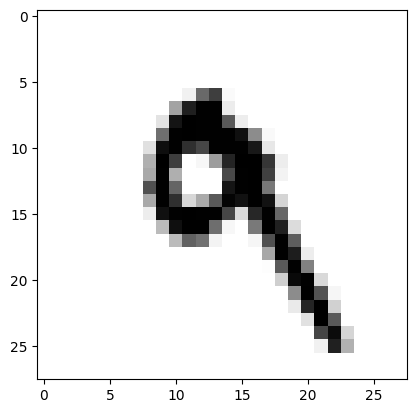

In [ ]:
import matplotlib.pyplot as plt
digit = test_digits[7].reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
